# Gráfico de Linhas

Gráfico de linha é um tipo de gráfico que exibe informações com um conjunto de pontos de dados, os marcadores, ligados por segmentos de reto. Esse gráfico é muito utilizado quando quer representar dados ao longo de intervalos de tempo iguais, pois ele é o que possui melhor visualização nesse quesito.

<center><img width = 50% src='https://images.squarespace-cdn.com/content/v1/55b6a6dce4b089e11621d3ed/1585088536506-8EH2VI07GYB0Q6SP7H4S/ke17ZwdGBToddI8pDm48kIwu5cT4Kl9tBQwdu_X5wm0UqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYy7Mythp_T-mtop-vrsUOmeInPi9iDjx9w8K4ZfjXt2dpptouX4k7MTvvR0fsFXPVIP1p8W6ua2SamCKcTBJiJjCjLISwBs8eEdxAxTptZAUg/bodytemp.png?format=500w'></center>

O eixo x (horizontal) é utilizado para mostrar a variação no tempo, seja dias, seja meses, seja anos, etc. Já o eixo y (vertical) é a variável dependente, ou seja, aquela que irá variar ao longo do tempo. 

## Plotar Gráfico de Linhas

Para exemplificação será utilizado conjunto de dados contendo o número de casos de dengue, por mês, para a cidade de Campinas-SP. O *dataset* também contém informações referentes a chuva, temperaturas médias, mínima e máxima do munícipio. Esse conjunto de dados contém informações desde 1998 até 2015.

In [1]:
#Importar Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

#Importar dados para o Dataframe
DATA_PATH = 'https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv'
df = pd.read_csv(DATA_PATH)
df.data = pd.to_datetime(df.data)
df.set_index('data', inplace=True)

#Ver 5 primeiras entradas
df.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


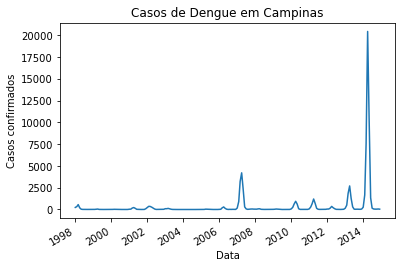

In [2]:
#Plotar o número de casos confirmados
fig, ax = plt.subplots()

ax.plot('casos-confirmados', data=df)
ax.set_title('Casos de Dengue em Campinas')
ax.set_xlabel('Data')
ax.set_ylabel('Casos confirmados')
fig.autofmt_xdate()

plt.show()

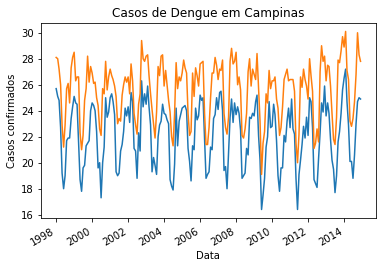

In [3]:
#Plotar o número de temperatura média e temperatura máxima
fig, ax = plt.subplots()

ax.plot('temperatura-media', data=df)
ax.plot('temperatura-maxima', data=df)
ax.set_title('Casos de Dengue em Campinas')
ax.set_xlabel('Data')
ax.set_ylabel('Casos confirmados')
fig.autofmt_xdate()

plt.show()

## Selecionar intervalos

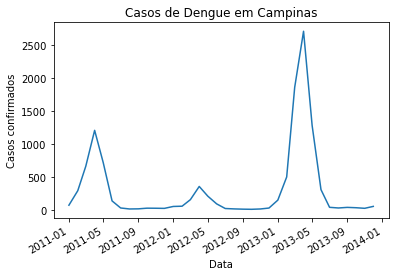

In [4]:
#Plotar o histograma da temperatura média "2011-01-01":"2013-12-31"
fig, ax = plt.subplots()

df_sel = df.loc['2011-01-01':'2013-12-31']

ax.plot('casos-confirmados', data=df_sel)
ax.set_title('Casos de Dengue em Campinas')
ax.set_xlabel('Data')
ax.set_ylabel('Casos confirmados')
fig.autofmt_xdate()

plt.show()

## Plotar múltiplos gráficos separadamente

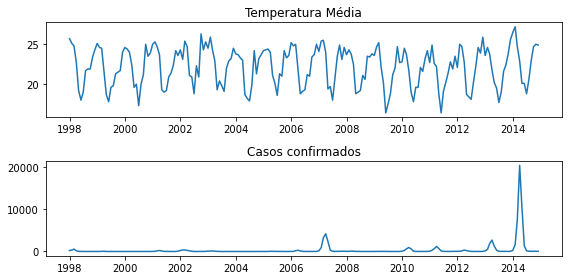

In [5]:
#Plotar o histogram da temperatura média
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 4))

#Plotar temperatura média
ax[0].plot('temperatura-media', data=df)
ax[0].set_title('Temperatura Média')

#Plotar casos confirmados
ax[1].plot('casos-confirmados', data=df)
ax[1].set_title('Casos confirmados')

plt.tight_layout()

## Plotar Múltiplos Gráficos Sobrepostos

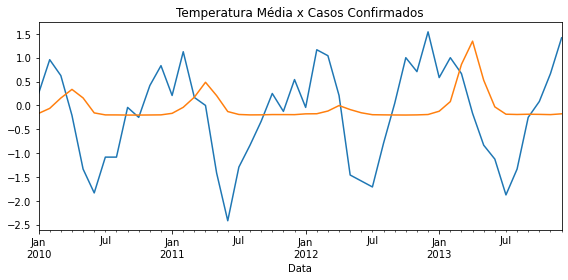

In [9]:
#plotar os gráficos normalizados
df_norm = (df - df.mean()) / df.std()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8, 4))

#Plotar temperatura média
df_norm.loc['2010-01-01': '2013-12-31', 'temperatura-media'].plot(kind='line', ax=ax)

#Plotar casos confirmados
df_norm.loc['2010-01-01': '2013-12-31', 'casos-confirmados'].plot(kind='line',ax=ax)

#Eixo x e title
ax.set_xlabel('Data')
ax.set_title('Temperatura Média x Casos Confirmados')

plt.tight_layout()